### 다중 회귀(여러 개의 특성을 사용한 선형 회귀)
- 특성 공학 : 기존 특성을 사용해 새로운 특성을 뽑아내는 작업

### 데이터 준비

In [1]:
import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [2]:
import numpy as np
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [3]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

In [4]:
print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)

(42, 3) (14, 3)
(42,) (14,)


### 사이킷런의 변환기

In [5]:
from sklearn.preprocessing import PolynomialFeatures # 임포트
poly = PolynomialFeatures() # 객체 생성
poly.fit([[2,3]]) # 훈련(학습)
print(poly.transform([[2,3]])) # 변형

[[1. 2. 3. 4. 6. 9.]]


- PolynomialFeatures 클래스는 기본적으로 각 특성을 제곱한 항을 추가하고 특성끼리 곱한 항을 추가함.

In [6]:
poly = PolynomialFeatures(include_bias=False) # 절편을 위한 항(1) 제거 후 제곱과 특성끼리 곱한 항만 리턴
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


In [7]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


In [10]:
poly.get_feature_names_out() #9개의 특성이 어떻게 만들어졌는지 확인

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [11]:
test_poly = poly.transform(test_input)

### 다중 회귀 모델 훈련하기

In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9903183436982124
0.9714559911594134


In [14]:
poly2 = PolynomialFeatures(degree=5, include_bias=False)
poly2.fit(train_input)
train_poly2 = poly2.transform(train_input)
test_poly2 = poly2.transform(test_input)
print(train_poly2.shape)

(42, 55)


In [16]:
lr.fit(train_poly2, train_target)
print(lr.score(train_poly2, train_target)) # 특성의 개수가 크게 늘어났기 때문에 훈련 세트에 대해 거의 완벽하게 학습
print(lr.score(test_poly2, test_target)) # 단, 테스트 세트에서는 형편없는 점수를 만듬 (샘플의 개수가 특성의 수보다 적어서)

0.9999999999991097
-144.40579242684848


### 규제

In [18]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler() # 객체 생성
ss.fit(train_poly2) # 학습
train_scaled = ss.transform(train_poly2) # 변형
test_scaled = ss.transform(test_poly2) # 변형 (훈련 세트로 학습한 변환기를 사용해 테스트 세트까지 변환해야 함)

### 릿지 회귀

In [20]:
from sklearn.linear_model import Ridge
ridge = Ridge() # 객체생성
ridge.fit(train_scaled, train_target) #학습
print(ridge.score(train_scaled, train_target)) # 훈련 세트 평가
print(ridge.score(test_scaled, test_target)) # 테스트 세트 평가

0.9896101671037343
0.9790693977615391


- 객체를 만들 때 alpha 매개변수로 규제의 강도 조절
- alpha 값이 크면 규제 강도가 세지므로 계수 값을 더 줄여 조금 더 과소적합되도록 유도
- alpha 값이 작으면 계수를 줄이는 역할이 줄어들기 대문에 과대적합될 가능성이 큼
- 하이퍼파라미터: 사람이 직접 지정해야 하는 매개변수 (학습변수)

In [21]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

In [22]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  ridge = Ridge(alpha=alpha)
  ridge.fit(train_scaled, train_target)
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

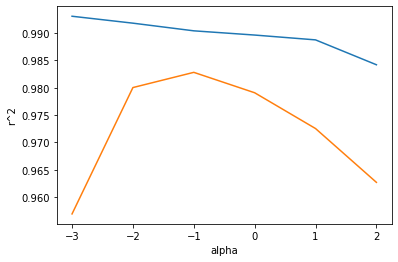

In [24]:
plt.plot(np.log10(alpha_list), train_score) # alpha_list에 있는 6개의 값을 동일한 간격으로 나타내기 위해 로그 함수로 바꾸어 지수로 표현
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('r^2')
plt.show()

In [25]:
ridge = Ridge(alpha=0.1) # 최적의 알파값 선정 후 대입
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570365
0.9827976465386884


### 라쏘 회귀

In [26]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421883


In [27]:
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  lasso = Lasso(alpha=alpha, max_iter=10000)
  lasso.fit(train_scaled, train_target)
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


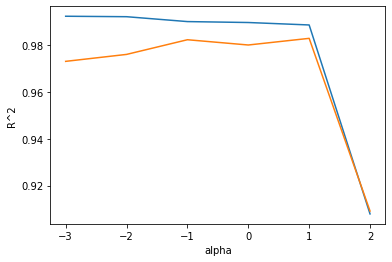

In [28]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [29]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [30]:
print(np.sum(lasso.coef_==0)) # 라쏘 모델은 계수 값을 아예 0으로 만들 수 있음, 0의 개수 체크

40


In [31]:
print(lasso.coef_)

[ 0.          0.          0.         12.14852453 55.44856399 42.23100799
  0.          0.         13.70596191  0.         43.2185952   5.7033775
 47.46254536  7.42309425 11.85823365  0.          0.         13.53038193
 21.22111356  0.          0.          0.          0.          0.
  0.         18.66993032  0.          0.          0.         15.81041778
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         18.14672268  0.          0.          0.
  0.         15.51272953  0.          0.          0.          0.
  0.        ]


- 55개의 특성을 모델에 주입했지만 라쏘 모델이 사용한 특성은 15개임 (55-40)
- 라쏘 모델은 유용한 특성을 골라내는 용도로도 사용할 수 있음